# Data Labelling Analysis (DLA) Dataset C

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for data labelling analisys
from data_labelling import mix_data
from data_labelling import split_data
from data_labelling import DataPreProcessor
from data_labelling import ClassificationModels

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/C_Obesity_Data_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/C_Obesity_Data_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/C_Obesity_Data_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/C_Obesity_Data_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/C_Obesity_Data_Synthetic_WGANGP.csv'}
categorical_columns = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','Obesity_level']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':       Gender  Age  Height  Weight family_history_with_overweight FAVC  \
 0     Female   21    1.63   60.00                            yes  yes   
 1     Female   21    1.75  133.62                            yes  yes   
 2     Female   23    1.66   82.60                            yes  yes   
 3     Female   22    1.59   44.24                             no   no   
 4       Male   26    1.81  106.04                            yes  yes   
 ...      ...  ...     ...     ...                            ...  ...   
 1683    Male   32    1.75  120.10                            yes  yes   
 1684    Male   23    1.72   81.67                            yes  yes   
 1685  Female   23    1.65   80.00                            yes  yes   
 1686  Female   23    1.63   84.50                            yes  yes   
 1687    Male   20    1.82   85.00                            yes  yes   
 
           FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF       TUE  \
 0     3.000000  3.00

## 2. Mix real data with synthetic data

In [5]:
mixed_data = dict()
for name in SYNTHESIZERS :
    mixed_data[name] = mix_data(data['Real'], data[name])
mixed_data

{'GM':       Gender  Age    Height      Weight family_history_with_overweight FAVC  \
 328     Male   26  1.790000  115.430000                            yes  yes   
 595   Female   26  1.620000  110.110000                            yes  yes   
 468     Male   24  1.598810   57.538966                            yes  yes   
 1588    Male   33  1.760000   66.500000                             no   no   
 739   Female   37  1.650000   73.000000                            yes   no   
 ...      ...  ...       ...         ...                            ...  ...   
 442     Male   34  1.710000  103.070000                            yes  yes   
 1412  Female   21  1.720000  131.930000                            yes  yes   
 1063    Male   24  1.727685   60.762994                            yes  yes   
 828     Male   21  1.630000   70.000000                             no  yes   
 1405    Male   39  1.855455  126.129901                            yes  yes   
 
           FCVC       NCP       

- 0 for real data
- 1 for synthetic data

## 2. Split train and test data

In [6]:
train_len = 0.8
train_data = dict()
test_data = dict()
for name in SYNTHESIZERS :
    print(name)
    train_data[name], test_data[name] = split_data(mixed_data[name], train_len)
    print(train_data[name].shape, test_data[name].shape)
    print('Train data', train_data[name].groupby('Label').size())
    print('Test data', test_data[name].groupby('Label').size())
    print('##############################################')

GM
(2700, 18) (675, 18)
Train data Label
0.0    1345
1.0    1355
dtype: int64
Test data Label
0.0    342
1.0    333
dtype: int64
##############################################
SDV
(2700, 18) (675, 18)
Train data Label
0.0    1342
1.0    1358
dtype: int64
Test data Label
0.0    345
1.0    330
dtype: int64
##############################################
CTGAN
(2700, 18) (675, 18)
Train data Label
0.0    1348
1.0    1352
dtype: int64
Test data Label
0.0    339
1.0    336
dtype: int64
##############################################
WGANGP
(2700, 18) (675, 18)
Train data Label
0.0    1373
1.0    1327
dtype: int64
Test data Label
0.0    315
1.0    360
dtype: int64
##############################################


## 3. Train Classifiers

In [7]:
categorical_columns = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','Obesity_level']
numerical_columns = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
categories = [np.array([0, 1]), np.array([0, 1]), np.array([0, 1]), np.array([0, 1, 2, 3]), np.array([0, 1]), 
              np.array([0, 1]), np.array([0, 1, 2, 3]), np.array([0, 1, 2, 3, 4]), np.array([0, 1, 2, 3, 4, 5, 6])]

#initialize classifiers
classifiers_all = dict()
data_preprocessors = dict()

target = 'Label'

for name in SYNTHESIZERS : 
    print(name)
    
    classifiers_all[name] = ClassificationModels()
    
    data_preprocessors[name] = DataPreProcessor(categorical_columns, numerical_columns, categories)
    x_train = data_preprocessors[name].preprocess_train_data(train_data[name].iloc[:, train_data[name].columns != target])
    y_train = train_data[name].loc[:, target]
    
    classifiers_all[name].train_classifiers(x_train, y_train)
    
    print('####################################################')

GM
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
SDV
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
CTGAN
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
WGANGP
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################


## 5. Evaluate Classifiers

In [8]:
results_all = dict()

for name in SYNTHESIZERS : 
    print(name)
    
    x_test = data_preprocessors[name].preprocess_test_data(test_data[name].loc[:, test_data[name].columns != target])
    print(x_test.shape)
    y_test = test_data[name].loc[:, target]
    
    classifiers_all[name].evaluate_classifiers(x_test, y_test)
    print('####################################################')

GM
(675, 38)
RF Tested
  model  accuracy  precision  recall      f1
0    RF    0.9644     0.9585    0.97  0.9642
KNN Tested
  model  accuracy  precision  recall      f1
0   KNN    0.7067     0.9091  0.4505  0.6024
DT Tested
  model  accuracy  precision  recall      f1
0    DT    0.9422     0.9509  0.9309  0.9408
SVM Tested
  model  accuracy  precision  recall      f1
0   SVM    0.5022     0.4969  0.7297  0.5912
MLP Tested
  model  accuracy  precision  recall      f1
0   MLP    0.7807     0.7761  0.7808  0.7784
####################################################
SDV
(675, 38)
RF Tested
  model  accuracy  precision  recall      f1
0    RF    0.9674     0.9611  0.9727  0.9669
KNN Tested
  model  accuracy  precision  recall    f1
0   KNN    0.7896      0.895  0.6455  0.75
DT Tested
  model  accuracy  precision  recall      f1
0    DT    0.9067      0.887  0.9273  0.9067
SVM Tested
  model  accuracy  precision  recall     f1
0   SVM     0.563     0.5552  0.5333  0.544
MLP Tested
  model  a

## 6. Analyse models results

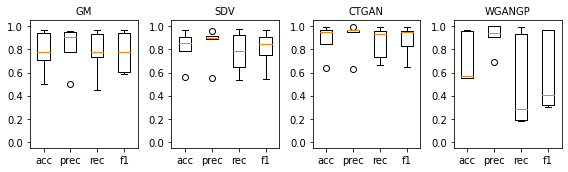

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(8, 2.5))
axs_idxs = [[0,0], [0,1], [1,0], [1,1]]
axs_idxs = [0, 1, 2, 3]
idx = dict(zip(SYNTHESIZERS,axs_idxs))

for name in SYNTHESIZERS :
    ax_plot = axs[idx[name]]
    classifiers_all[name].plot_classification_metrics(ax_plot)
    ax_plot.set_title(name, fontsize=10)

plt.tight_layout()
fig.savefig('DATA LABELLING RESULTS/CLASSIFICATION_METRICS.svg', bbox_inches='tight')